In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [3]:
df = pd.read_csv('../data/raw/Telco-Customer-Churn.csv')
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.shape

(7043, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


🎯 Churn Distribution:
Churn
No     5174
Yes    1869
Name: count, dtype: int64
Churn
No     73.46
Yes    26.54
Name: count, dtype: float64


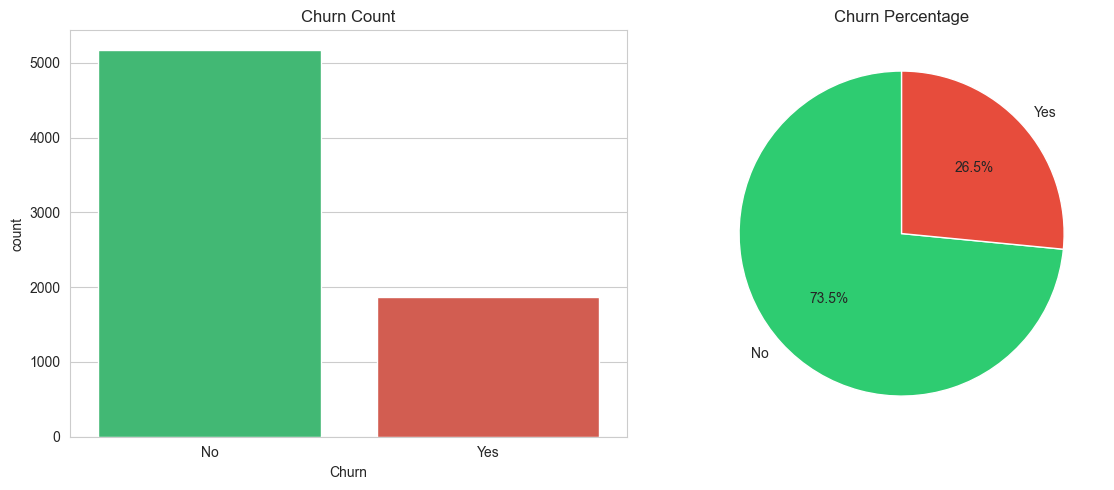

In [11]:
target = 'Churn'

churn_counts = df[target].value_counts()
churn_pct = churn_counts / len(df) * 100

print("\n🎯 Churn Distribution:")
print(churn_counts)
print(churn_pct.round(2))

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(x=target, data=df, ax=axes[0], palette=['#2ecc71', '#e74c3c'])
axes[0].set_title("Churn Count")

axes[1].pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%',
            colors=['#2ecc71', '#e74c3c'], startangle=90)
axes[1].set_title("Churn Percentage")

plt.tight_layout()
plt.show()



📊 Numerical Columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges']


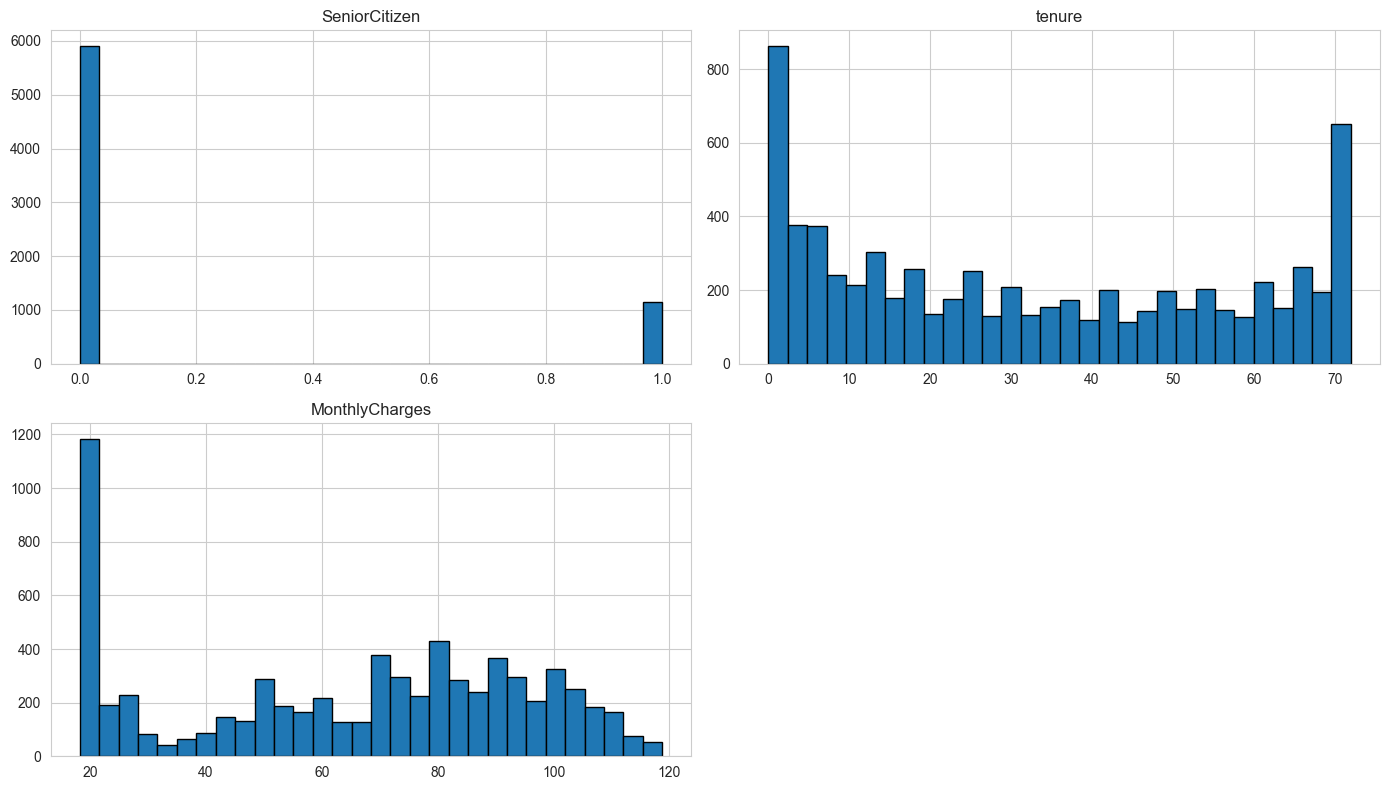

In [12]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

print(f"\n📊 Numerical Columns: {num_cols}")
df[num_cols].hist(bins=30, figsize=(14,8), edgecolor='black')
plt.tight_layout()
plt.show()



🔗 Top 10 Features Correlated with Churn:
Churn             1.000000
MonthlyCharges    0.193356
SeniorCitizen     0.150889
tenure           -0.352229
Name: Churn, dtype: float64


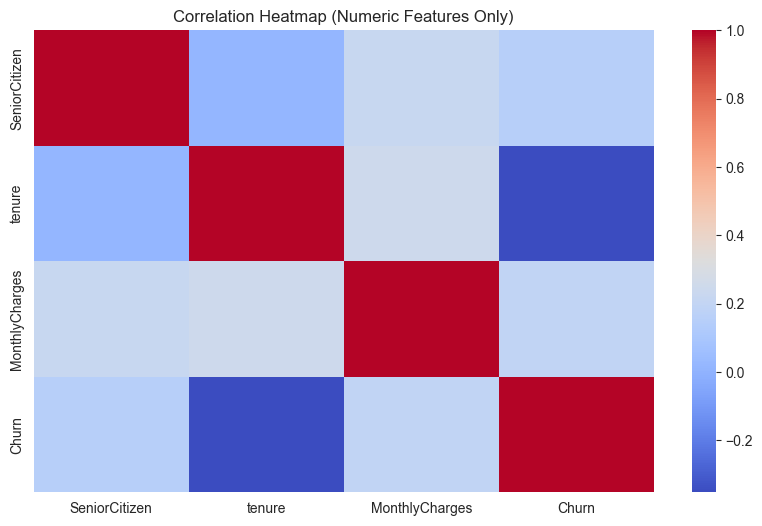

In [14]:
# Compute correlation only on numeric columns
numeric_df = df_encoded.select_dtypes(include=[np.number])
corr = numeric_df.corr()[target].sort_values(ascending=False)

print("\n🔗 Top 10 Features Correlated with Churn:")
print(corr.head(10))

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()


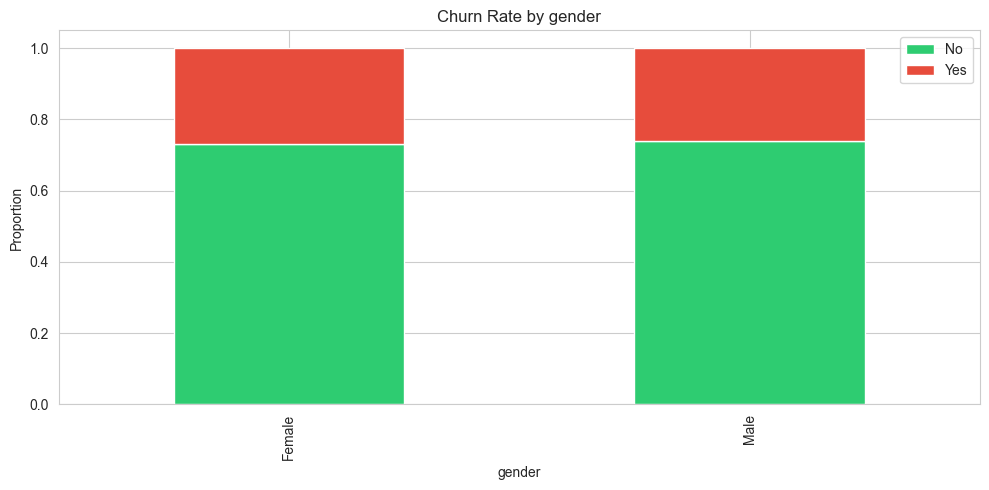

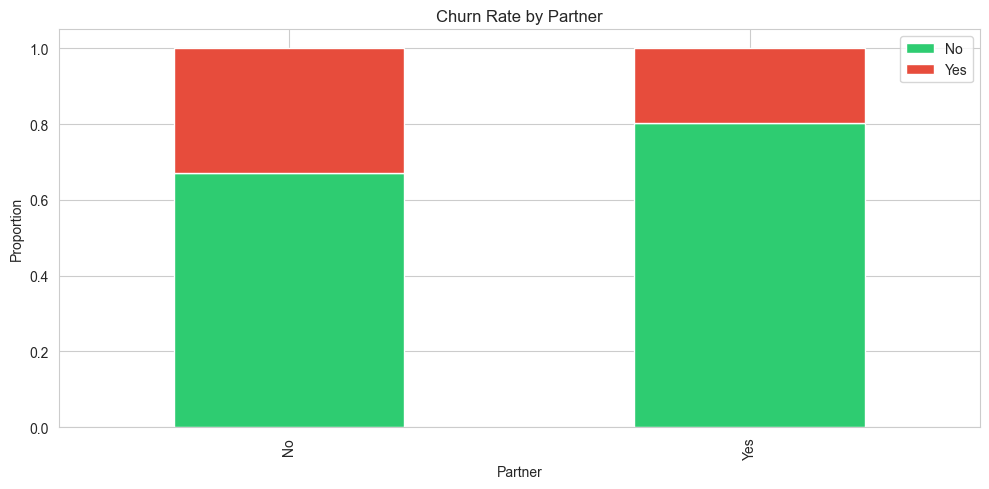

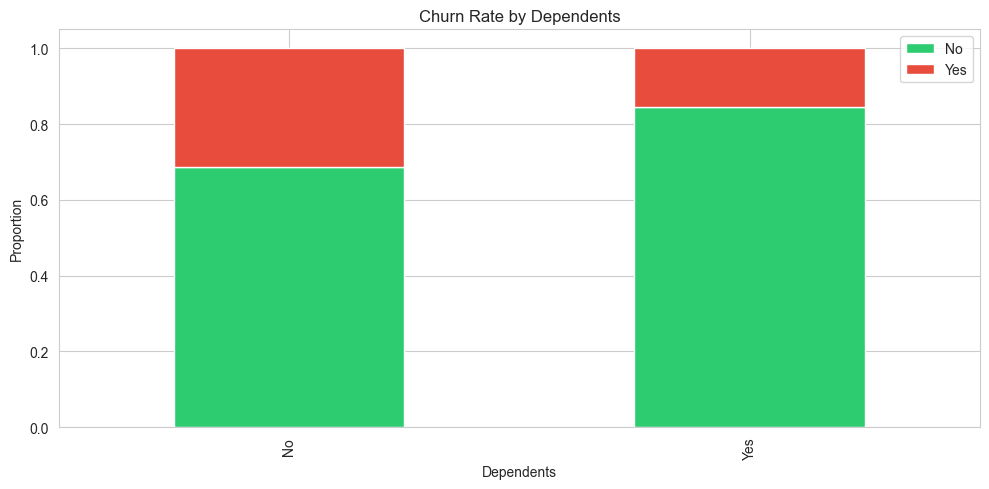

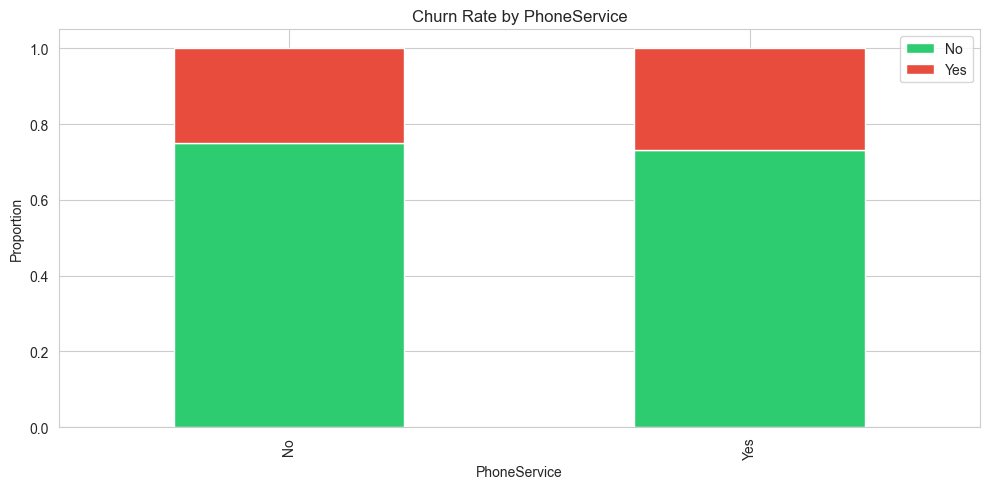

In [16]:
cat_cols = df.select_dtypes(include=['object']).columns.drop(target)

# Exclude unique identifier columns like customerID
cat_cols = [col for col in cat_cols if col.lower() != 'customerid']

for col in cat_cols[:4]:  # visualize first 4 meaningful categorical features
    churn_rate = df.groupby(col)[target].value_counts(normalize=True).unstack()
    churn_rate.plot(kind='bar', stacked=True, figsize=(10,5), color=['#2ecc71', '#e74c3c'])
    plt.title(f'Churn Rate by {col}')
    plt.ylabel('Proportion')
    plt.xlabel(col)
    plt.legend(['No', 'Yes'])
    plt.tight_layout()
    plt.show()


In [17]:
churn_rate = df[target].value_counts(normalize=True).get('Yes', 0) * 100
print(f"""
💡 KEY INSIGHTS
--------------------------
• Churn Rate: {churn_rate:.1f}%
• Numerical Features: {len(num_cols)}
• Categorical Features: {len(cat_cols)}
• Missing Values: {missing.sum()}
• Top Correlated Features:
{corr.head(6).to_string()}
--------------------------
✅ Next: Proceed to Feature Engineering
""")



💡 KEY INSIGHTS
--------------------------
• Churn Rate: 26.5%
• Numerical Features: 3
• Categorical Features: 16
• Missing Values: 0
• Top Correlated Features:
Churn             1.000000
MonthlyCharges    0.193356
SeniorCitizen     0.150889
tenure           -0.352229
--------------------------
✅ Next: Proceed to Feature Engineering

